# Лабораторная работа №4

### Методы интерполяции

Что было сделано в рамках лабораторной работы:
- Реализованы методы интерполяции (метод Ньтона)
- Написаны тесты для проверки корректности интерполяторов ([test_nonlinear_solver](../tests/test_interpolation/test_interpolator_methods.py))

In [50]:
# Необходимые импорты
import numpy as np
from comp_math.interpolation.interpolator_registry import InterpolatorRegistry
import matplotlib.pyplot as plt
import pandas as pd

#### 1) Данные о населении планеты с 1970 по 2025 год
Загрузим данные из папки sources, где они лежат в формате csv файла

In [84]:
data = pd.read_csv('sources/world_population.csv', sep=';')
data['population'] = data['population'].astype(float)
data['year'] = data['year'].astype(float)
data = data.sort_values('year')
data.head()

,year,population
55,1970.0,3.694684e+09
54,1971.0,3.769848e+09
53,1972.0,3.844918e+09
52,1973.0,3.920805e+09
51,1974.0,3.996416e+09


Посмотрим на полученный график

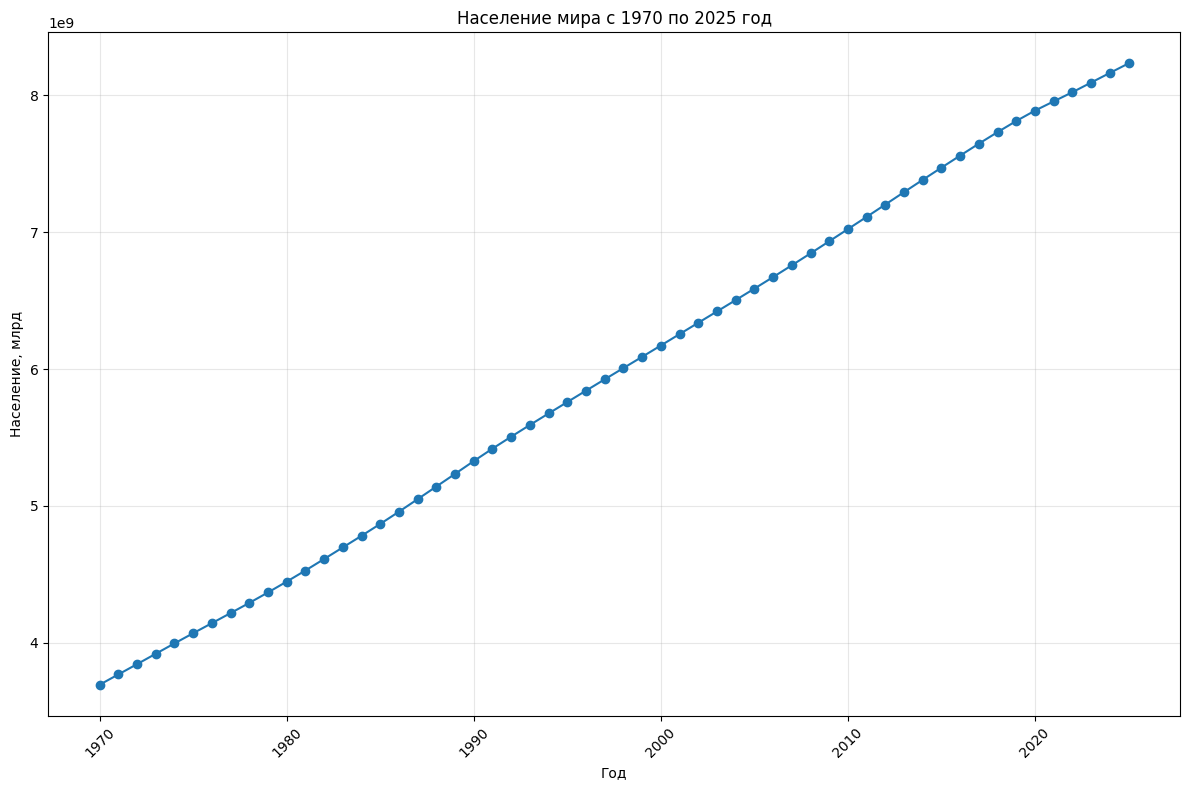

In [85]:
plt.figure(figsize=(12, 8))

plt.plot(data['year'], data['population'], marker='o')

plt.title('Население мира с 1970 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Население, млрд')

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2) Выбросим теперь несколько точек. Для примера возьмём годы 1981, 1993, 2006 и проведем интерполяцию в этих точек с помощью разлчиных алгоримтов.

Используемые методы и годы для интерполяции

In [87]:
methods = [
    (InterpolatorRegistry.create_solver("newton"), "Метод Ньютона")
]

year_for_interpolation = [1981, 1993, 2006]

indices_to_drop = data[data['year'].isin(year_for_interpolation)].index
data_filtered = data.drop(indices_to_drop).reset_index(drop=True)

Проведём интерполяцию

In [97]:
results = []

for interpolator, name in methods:
    interpolated_population = []
    
    for target_year in year_for_interpolation:
        window_size = 2 # количество точек с каждой стороны от точки интерполяции
        years_before = data_filtered[data_filtered['year'] < target_year]['year'].head(window_size)
        years_after = data_filtered[data_filtered['year'] > target_year]['year'].tail(window_size)
        
        nearby_years = list(years_before) + list(years_after)
        nearby_populations = data_filtered[data_filtered['year'].isin(nearby_years)]['population']
        
 
        interpolator.fit(np.array(nearby_years), np.array(nearby_populations))
        population_at_year = interpolator([target_year])[0]
        interpolated_population.append(population_at_year)

    results.append({
        'name': name,
        'interpolated_population': interpolated_population,
        'residuals': data.loc[indices_to_drop, 'population'] - interpolated_population, 
    })
    
    print(f"{name}: {interpolated_population}")

Метод Ньютона: [np.float64(4570528899.228511), np.float64(5606240458.223061), np.float64(6740276636.817611)]


Отобразим исходные узлы и интерполированные значения

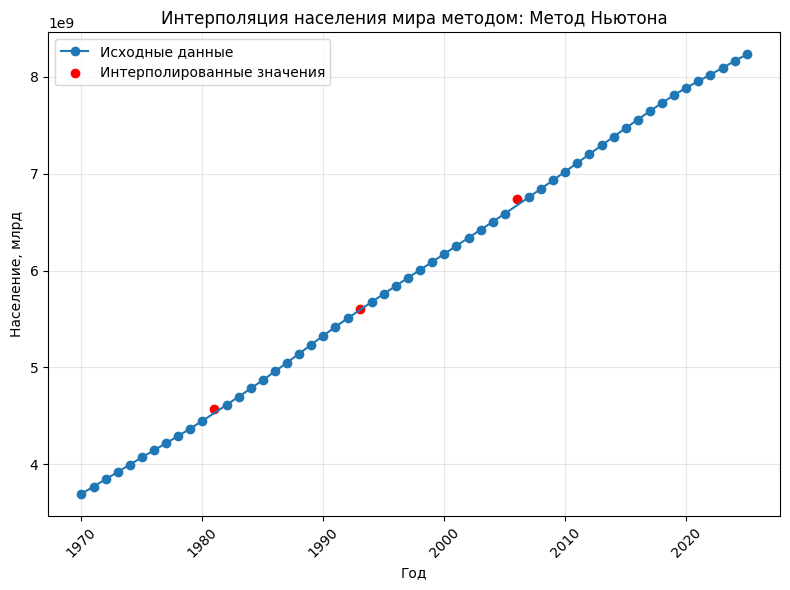

In [107]:
for i, result in enumerate(results):
    plt.figure(figsize=(8, 6))
    
    # Исходные данные
    plt.plot(data_filtered['year'], data_filtered['population'], 
             marker='o', label='Исходные данные')
    
    # Интерплированные точки
    plt.scatter(year_for_interpolation, result['interpolated_population'], 
               color='red', label='Интерполированные значения')
    
    plt.title(f'Интерполяция населения мира методом: {result["name"]}')
    plt.xlabel('Год')
    plt.ylabel('Население, млрд')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()